In [2]:
import pandas as pd
import seaborn as sns

df1 = pd.read_csv("./dataset/mnist_test.csv")

df2 = pd.read_csv("./dataset/mnist_train.csv")

data = pd.concat([df1,df2],axis = 0)


In [34]:
import os

os.makedirs("./dataset/img_dataset" , exist_ok = True)

dataset_dir = "./dataset/img_dataset"



In [38]:

# Image Dataset creation

import matplotlib.pyplot as plt
from tqdm import tqdm
for i in tqdm(range(len(df2))):
    
    
    # Assuming the first row is the first image
    image = df2.iloc[0, 1:].values.reshape(28, 28)
#     plt.imshow(image, cmap='gray')
#     plt.title(f"Label: {df2.iloc[i, 0]}")
#     plt.show()
    
    dir_path = os.path.join(dataset_dir,str(df2.iloc[i, 0]))
    os.makedirs(dir_path , exist_ok = True)
    
    filename = f"{i}.jpg"
    file_path = os.path.join(dir_path,filename)
    plt.imsave(file_path,image)
    

 17%|████████████▊                                                              | 10248/59999 [00:30<02:29, 332.17it/s]


KeyboardInterrupt: 

In [ ]:
for i in tqdm(range(len(df2))):
    
    
    # Assuming the first row is the first image
    image = df1.iloc[0, 1:].values.reshape(28, 28)
#     plt.imshow(image, cmap='gray')
#     plt.title(f"Label: {df2.iloc[i, 0]}")
#     plt.show()
    
    dir_path = os.path.join(dataset_dir,str(df2.iloc[i, 0]))
    os.makedirs(dir_path , exist_ok = True)
    
    filename = f"{i}_train.jpg"
    file_path = os.path.join(dir_path,filename)
    plt.imsave(file_path,image)

In [3]:
test_df = pd.read_csv("./dataset/mnist_test.csv")

train_df = pd.read_csv("./dataset/mnist_train.csv")

In [4]:
# Check the shape of the datasets
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

# Check for missing values
print("Missing values in train data:\n", train_df.isnull().sum())
print("Missing values in test data:\n", test_df.isnull().sum())

# Display the first few rows of the training data
print(train_df.head())

Train data shape: (59999, 785)
Test data shape: (9999, 785)
Missing values in train data:
 5        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.613    0
0.614    0
0.615    0
0.616    0
0.617    0
Length: 785, dtype: int64
Missing values in test data:
 7        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Length: 785, dtype: int64
   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0 

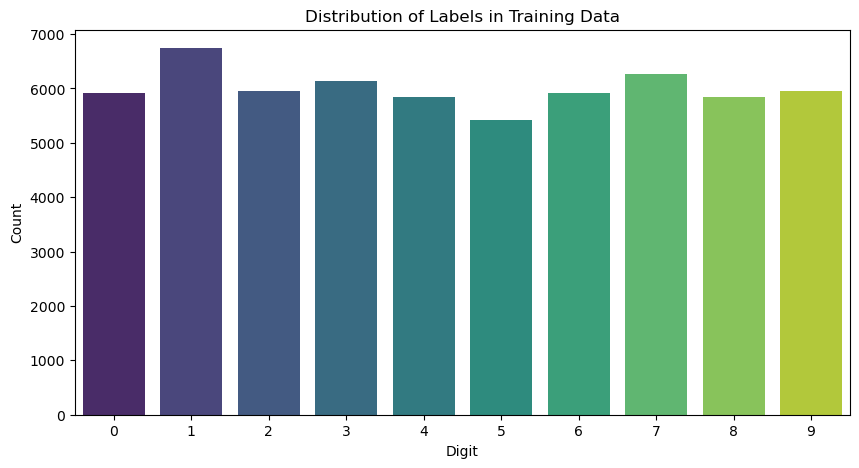

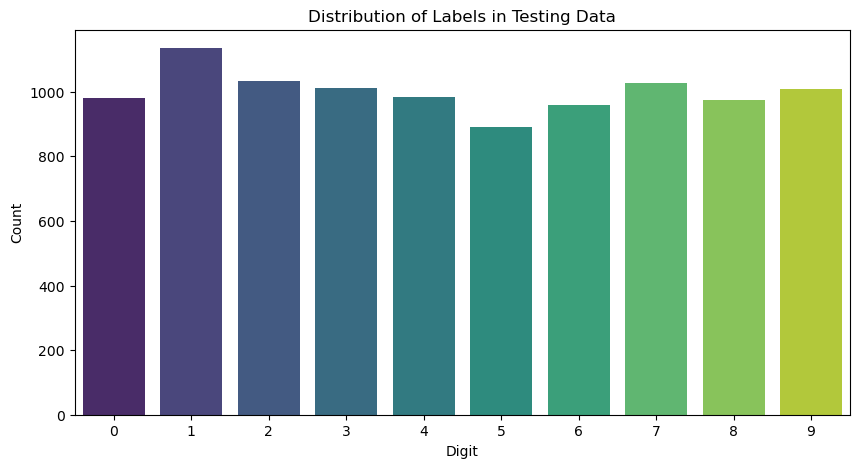

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels in the training data
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df.iloc[:, 0], palette='viridis')  # Use the 0th column as labels
plt.title("Distribution of Labels in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

# Plot the distribution of labels in the testing data
plt.figure(figsize=(10, 5))
sns.countplot(x=test_df.iloc[:, 0], palette='viridis')  # Use the 0th column as labels
plt.title("Distribution of Labels in Testing Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

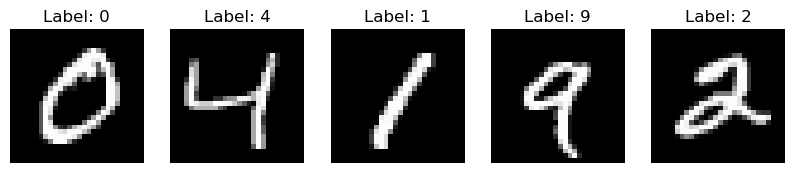

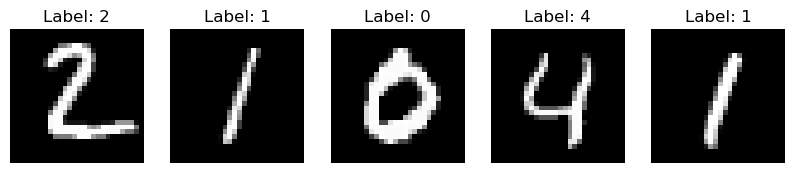

In [6]:
# Function to plot sample images
def plot_sample_images(data, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        # Reshape the flattened image to 28x28
        image = data.iloc[i, 1:].values.reshape(28, 28)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {data.iloc[i, 0]}")
        plt.axis('off')
    plt.show()

# Plot sample images from the training data
plot_sample_images(train_df)

# Plot sample images from the testing data
plot_sample_images(test_df)

In [ ]:
# Flatten all pixel values (excluding the label column)
train_pixels = train_df.iloc[:, 1:].values.flatten()
test_pixels = test_df.iloc[:, 1:].values.flatten()

# Plot the distribution of pixel intensities
plt.figure(figsize=(10, 5))
sns.histplot(train_pixels, bins=50, color='blue', label='Train Data', kde=True)
sns.histplot(test_pixels, bins=50, color='orange', label='Test Data', kde=True)
plt.title("Distribution of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [8]:
# Check the number of samples per class in the training data
print("Training data class distribution:\n", train_df.iloc[:, 0].value_counts())

# Check the number of samples per class in the testing data
print("Testing data class distribution:\n", test_df.iloc[:, 0].value_counts())

Training data class distribution:
 5
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: count, dtype: int64
Testing data class distribution:
 7
1    1135
2    1032
7    1027
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64


In [ ]:
# Compute the correlation matrix
corr_matrix = train_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
train_reduced = pca.fit_transform(train_df.iloc[:, 1:])

# Plot the reduced data
plt.figure(figsize=(10, 7))
sns.scatterplot(x=train_reduced[:, 0], y=train_reduced[:, 1], hue=train_df['label'], palette='viridis')
plt.title("PCA of MNIST Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()